# Combine multiple protein and peptide annotations to create a single annotation for Cytoscape - March 11, 2017

Use the Olsen 2006 input data and TPS output

## Set up file locations

In [1]:
% pylab inline
%cd ../python

import os
import EGFRUtil
import pandas as pd

baseDir = os.path.join('..','..')
tps_in_dir = os.path.join(baseDir, 'phosphorylation-data-sets', 'Olsen2006', '2017-02-14-TPS-input')
tps_out_dir = os.path.join(baseDir, 'evaluation', '2017-02-26-olsen-TPS-fixed')

# Use the version with the header line
pepMapFile = os.path.join(tps_in_dir, 'peptide-protein-mapping-header.tsv')
pepFirstFile = os.path.join(tps_in_dir, 'first-scores.tsv')
pepPrevFile = os.path.join(tps_in_dir, 'prev-scores.tsv')
timeSeriesFile = os.path.join(tps_in_dir, 'time-series.tsv')

windowsFile = os.path.join(tps_out_dir, 'activity-windows.tsv')
networkFile = os.path.join(tps_out_dir, 'output.sif')

# Use the same EGFR gold standard for Olsen 2006 and Ale's data
goldStandardFile = os.path.join(baseDir, 'evaluation', '2014-10-03', 'eight-egfr-reference-all.txt')

styleTemplateFile = os.path.join(baseDir, 'src', 'tps', 'local', 'visualization', 'tps_style_template.xml')

out_dir = os.path.join(baseDir, 'evaluation', '2017-03-11-olsen-2006-TPS-cytoscape')
if not os.path.exists(out_dir):
    os.makedirs(out_dir)
    print('Created {}'.format(out_dir))
outFile = os.path.join(out_dir, 'olsen-2006-cytoscape-annotations-031117.txt')
outStyleFile = os.path.join(out_dir, 'tps_style.xml')

Populating the interactive namespace from numpy and matplotlib
C:\Users\agitter\Desktop\postdocToSave\egfr\src\python


## Call the function to load the temporal and EGFR gold standard annotations and merge them into a Cytoscape-readable format

In [2]:
pvalThresh = 0.0 # Not using real p-values, they are 0 if the fold change exceeds a threshold and 1 otherwise
logTransform = True
logDefault = -8.060178248970553 # Prize from SQSTM_HUMAN, multiply by -1 because we are replacing a fold change from 1.0 to 0.0
pepsPerProt = EGFRUtil.PrepTemporalCytoscapeTPS(pepMapFile, timeSeriesFile, pepFirstFile,
                             pepPrevFile, windowsFile, networkFile,
                             goldStandardFile, pvalThresh, logTransform, styleTemplateFile,
                             outFile, outStyleFile, logDefault)

Loaded protein id map for 1050 peptides
Loaded 1050 peptides and 4 scores in the first and previous score files
Loaded prizes for 1050 peptides
302 peptides with significant prizes (>= 10)
Using default value of -8.060178 for log2(0)
Loaded time series for 648 proteins (and pseudonodes)
Min value in time series: -8.060178
Max value in time series: 5.659138
Mean peptides per protein: 1.620370
Max peptides per protein: 31
Max significant peptides per protein: 14
Max insignificant peptides per protein: 25
Loaded activity windows for 282 proteins
Loaded 324 gold standard reference pathway proteins
Loaded 280 proteins on the synthesized pathway
Wrote attributes for 37 Steiner nodes in the TPS pathway
Wrote attributes for 130 prize nodes in the TPS pathway with a significant peptide
Wrote attributes for 113 prize nodes in the TPS pathway with no significant peptides
Wrote attributes for 405 proteins excluded by PCSF or TPS


## Plot the number of peptides per protein¶

491 proteins with 1 peptide(s)
74 proteins with 2 peptide(s)
37 proteins with 3 peptide(s)
22 proteins with 4 peptide(s)
8 proteins with 5 peptide(s)
4 proteins with 6 peptide(s)
2 proteins with 7 peptide(s)
2 proteins with 8 peptide(s)
2 proteins with 9 peptide(s)
1 proteins with 10 peptide(s)
0 proteins with 11 peptide(s)
1 proteins with 12 peptide(s)
1 proteins with 13 peptide(s)
0 proteins with 14 peptide(s)
1 proteins with 15 peptide(s)
0 proteins with 16 peptide(s)
0 proteins with 17 peptide(s)
0 proteins with 18 peptide(s)
1 proteins with 19 peptide(s)
0 proteins with 20 peptide(s)
0 proteins with 21 peptide(s)
0 proteins with 22 peptide(s)
0 proteins with 23 peptide(s)
0 proteins with 24 peptide(s)
0 proteins with 25 peptide(s)
0 proteins with 26 peptide(s)
0 proteins with 27 peptide(s)
0 proteins with 28 peptide(s)
0 proteins with 29 peptide(s)
0 proteins with 30 peptide(s)
1 proteins with 31 peptide(s)


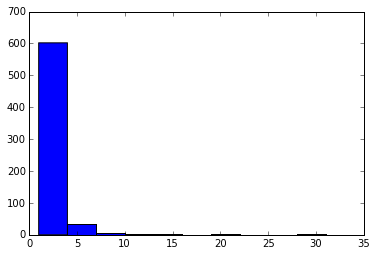

In [3]:
hist(pepsPerProt)
for count in range(1,max(pepsPerProt)+1):
    print "%d proteins with %d peptide(s)" % (sum([x == count for x in pepsPerProt]), count)

## Test parts of the Cytoscape table

In [4]:
cytoDf = pd.read_csv(outFile, sep='\t')
cytoDf.head()

,Protein,NodeType,ReferencePathway,SigPeptide1,SigPeptide2,SigPeptide3,SigPeptide4,SigPeptide5,SigPeptide6,SigPeptide7,...,InsigPeptide24,InsigPeptide25,ActivitySummary1,ActivitySummary5,ActivitySummary10,ActivitySummary20,FirstActive,HeatMapBg1,HeatMapBg2,HeatMapBg3
0,1433G_HUMAN,Steiner,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,"0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0"
1,1A23_HUMAN,Excluded,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Not active,"0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0"
2,4EBP1_HUMAN,SigPrize,True,"0.0, 0.0, 0.742666970333, 2.1708665688, 1.7688...","0.0, 0.0, 0.742666970333, 2.1708665688, 1.7688...","0.0, 0.0, 0.742666970333, 2.1708665688, 1.7688...",NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,1.0,0.0,10,"0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0"
3,50710_IPI00029159_PSEUDONODE,Excluded,False,"0.0, 0.678071905113, 2.0, 2.13750352375, 2.226...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Not active,"0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0"
4,50760_IPI00082831_PSEUDONODE,Excluded,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Not active,"0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0"


In [5]:
# Verify that all TPS nodes are in the annotation file
tpsNodes = set()
with open(networkFile) as net_f:
    for line in net_f:
        parts = line.strip().split('\t')
        tpsNodes.add(parts[0])
        tpsNodes.add(parts[2])

subsetDf = cytoDf[cytoDf['NodeType'] != 'Excluded']
subsetNodes = set(subsetDf['Protein'].values)
assert tpsNodes == subsetNodes
print 'All TPS nodes are in the annotation file'

# Verify all prize nodes have peptides listed in the annotation file
prizeNodes = set()
with open(pepMapFile) as net_f:
    # Skip the header
    net_f.next()
    for line in net_f:
        parts = line.strip().split('\t')
        prizeNodes.add(parts[1])
# All proteins in the annotation file with a significant or insignificant peptide
subsetNodes = set(cytoDf.loc[cytoDf['SigPeptide1'].notnull() | cytoDf['InsigPeptide1'].notnull(), 'Protein'].values)
assert prizeNodes == subsetNodes
print 'All prize nodes are in the annotation file'

# Verify all nodes in the annotation file are from the TPS network or the prize nodes
allNodes = set()
allNodes.update(tpsNodes)
allNodes.update(prizeNodes)
subsetNodes = set(cytoDf['Protein'].values)
assert allNodes == subsetNodes
print 'All nodes in the annotation file are from TPS or the prize nodes'

# Verify the reference pathway overlap matches what was observed previously
assert len(cytoDf[cytoDf['ReferencePathway'] & (cytoDf['NodeType'] != 'Excluded')]) == 33
print 'All nodes in the TPS pathway and EGFR reference pathways are in the annotation file'

# Verify first activity times
assert cytoDf.loc[cytoDf['Protein'] == 'MARCS_HUMAN', 'FirstActive'].values == '20'
assert cytoDf.loc[cytoDf['Protein'] == 'BCLF1_HUMAN', 'FirstActive'].values == '1'
print 'Nodes in annotation file have expected first activity time'

# Verify all excluded nodes have no first activity time
assert np.all((cytoDf['NodeType'] == 'Excluded') == (cytoDf['FirstActive'] == 'Not active'))
print 'All excluded nodes have no activity time and vice versa'

# Verify that these proteins have the expected number of significant and insignificant peptides
assert sum(cytoDf.loc[cytoDf['Protein'] == 'EGFR_HUMAN', 'SigPeptide1':'SigPeptide14'].notnull().values) == 14
assert sum(cytoDf.loc[cytoDf['Protein'] == 'EGFR_HUMAN', 'InsigPeptide1':'InsigPeptide25'].notnull().values) == 1

assert sum(cytoDf.loc[cytoDf['Protein'] == 'AHNK_HUMAN', 'SigPeptide1':'SigPeptide14'].notnull().values) == 6
assert sum(cytoDf.loc[cytoDf['Protein'] == 'AHNK_HUMAN', 'InsigPeptide1':'InsigPeptide25'].notnull().values) == 25

assert sum(cytoDf.loc[cytoDf['Protein'] == 'S38A2_HUMAN', 'SigPeptide1':'SigPeptide14'].notnull().values) == 7
assert sum(cytoDf.loc[cytoDf['Protein'] == 'S38A2_HUMAN', 'InsigPeptide1':'InsigPeptide25'].notnull().values) == 0
print 'Proteins have expected number of peptides'

# Verify the two proteins that need the default log value contain it in their time series
def MinLogFC(row):
    fcs = []
    for timeSeries in row:
        if not str(timeSeries) == 'nan':
            fcs.extend(map(float, timeSeries.split(', ')))
    return min(fcs)

assert np.isclose(MinLogFC(cytoDf.loc[cytoDf['Protein'] == 'LS14A_HUMAN', 'SigPeptide1':'InsigPeptide25'].values[0]),logDefault)
assert np.isclose(MinLogFC(cytoDf.loc[cytoDf['Protein'] == 'BMP1_HUMAN', 'SigPeptide1':'InsigPeptide25'].values[0]),logDefault)
print 'Expected proteins have default log2 fold change'

# Verify min fold change of another protein
assert np.isclose(MinLogFC(cytoDf.loc[cytoDf['Protein'] == 'Q96RG5_HUMAN', 'SigPeptide1':'InsigPeptide25'].values[0]),-1.134229461)
print 'Protein has expected min log2 fold change'

with open(outStyleFile) as f:
    styleContent = f.read()
    assert '$$$' not in styleContent
print 'Removed placeholders from style file'

All TPS nodes are in the annotation file
All prize nodes are in the annotation file
All nodes in the annotation file are from TPS or the prize nodes
All nodes in the TPS pathway and EGFR reference pathways are in the annotation file
Nodes in annotation file have expected first activity time
All excluded nodes have no activity time and vice versa
Proteins have expected number of peptides
Expected proteins have default log2 fold change
Protein has expected min log2 fold change
Removed placeholders from style file
